<a href="https://colab.research.google.com/github/sam22ridhi/amazon_ml/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [8]:
data=pd.read_csv('train.csv')

In [9]:
data.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919.0,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768.0,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516.0,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516.0,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432.0,item_weight,1400 milligram


In [10]:
from glob import glob
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt

#pytesseract
#easyocr
#kerasocr

In [11]:
import requests

In [12]:
def download_image(url):
    """Downloads an image from the specified URL and returns a PIL Image object."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        image = Image.open(io.BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")
        return None

In [13]:
import io

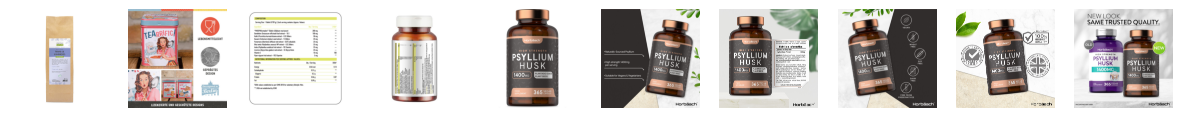

In [14]:
images = []

# Loop through the first 5 rows in the DataFrame to download images
for index, row in data.iterrows():
    if index < 10:  # Only download the first 5 images
        image_url = row['image_link']
        image = download_image(image_url)
        if image:
            images.append(image)

# Display the downloaded images
if images:
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):  # Display only the downloaded images
        plt.subplot(1, len(images), i + 1)  # Create a subplot for each image
        plt.imshow(images[i])
        plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No images were downloaded.")

In [15]:
pip install pytesseract

In [16]:
# Install Tesseract OCR
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,030 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,439 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14 https://r2u

In [17]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [18]:
import pytesseract

# Set Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [19]:
import pytesseract

In [20]:
print(pytesseract.image_to_string(images[0],lang='eng'))

Oa

 



In [2]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.6 MB/s eta 0:00:00


In [3]:
#easyocr
import easyocr
reader=easyocr.Reader(['en'],gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [25]:
results=reader.readtext(images[6])

In [23]:
results

[([[289, 61], [581, 61], [581, 79], [289, 79]],
  'LLa eelE=_',
  0.0007747083228779691),
 ([[343, 83], [433, 83], [433, 99], [343, 99]], '62', 0.6833567335620933),
 ([[505, 105], [593, 105], [593, 123], [505, 123]], 'R', 0.011841198661202645),
 ([[328, 237], [587, 237], [587, 353], [328, 353]],
  'RRIFICH',
  0.28512930876881565),
 ([[841, 341], [1153, 341], [1153, 383], [841, 383]],
  'LEBENSMITTELECHT',
  0.9993236383897186),
 ([[249, 431], [311, 431], [311, 473], [249, 473]],
  'Cwwv',
  0.43178483843803406),
 ([[258, 452], [320, 452], [320, 502], [258, 502]], 'DAV', 0.5323015630576684),
 ([[902, 708], [1094, 708], [1094, 758], [902, 758]],
  'GEPRAGTES',
  0.9980304076502575),
 ([[937, 761], [1059, 761], [1059, 803], [937, 803]],
  'DESIGN',
  0.99646868339085),
 ([[436, 906], [574, 906], [574, 954], [436, 954]],
  'As YQULIKE',
  0.2808490858232691),
 ([[619, 899], [681, 899], [681, 940], [619, 940]],
  'BEST',
  0.9948495030403137),
 ([[898, 920], [1093, 920], [1093, 956], [898,

In [26]:
results[0]

([[639, 811], [983, 811], [983, 877], [639, 877]],
 'HOrbaach',
 0.6110116601165128)

In [27]:
!pip install keras-ocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00


In [28]:
images = []
for index, row in tqdm(data.iterrows(), total=len(data), desc="Downloading Images"):
    image_url = row['image_link']
    image = download_image(image_url)
    if image is not None:
        images.append(image)

print("Download complete.")

Error downloading image from https://m.media-amazon.com/images/I/1yw53vfQtS.jpg: 400 Client Error: Bad Request for url: https://m.media-amazon.com/images/I/1yw53vfQtS.jpg


KeyboardInterrupt: 

In [29]:
import keras_ocr